# EDA of SPX Data

### Plan for EDA
Each section will compare overall vs put vs call
1. Describing the data
2. Correlation Analyses
3. Time Series Data
4. Greeks

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Describing the data

In [3]:
df = pd.read_csv('L3_SPXW_20240423.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15924 entries, 0 to 15923
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   underlying       15924 non-null  object 
 1   underlying_last  15924 non-null  float64
 2    exchange        15924 non-null  object 
 3   optionroot       15924 non-null  object 
 4   optionext        0 non-null      float64
 5   type             15924 non-null  object 
 6   expiration       15924 non-null  object 
 7   quotedate        15924 non-null  object 
 8   strike           15924 non-null  int64  
 9   last             15924 non-null  float64
 10  bid              15924 non-null  float64
 11  ask              15924 non-null  float64
 12  volume           15924 non-null  int64  
 13  openinterest     15924 non-null  int64  
 14  impliedvol       15924 non-null  float64
 15  delta            15924 non-null  float64
 16  gamma            15924 non-null  float64
 17  theta       

### Dropping null columns
`optionext`, `optionalias`, `IVBid` and `IVAsk` are entirely null.

In [5]:
df = df.drop(['optionext','optionalias','IVBid','IVAsk'],axis=1)

### Converting relevant columns to datetime
`expiration` and `quotedate`

In [6]:
df['expiration'] = pd.to_datetime(df['expiration'])
df['quotedate'] = pd.to_datetime(df['quotedate'])


## Splitting the df into puts and calls for additional comparisons

In [7]:
df_put = df[df['type'] == 'put']
df_call = df[df['type'] == 'call']

In [8]:
df_put.describe()

underlying_last                     expiration  \
count     7.962000e+03                           7962   
mean      5.070470e+03  2024-06-17 14:35:54.031650304   
min       5.070470e+03            2024-04-23 00:00:00   
25%       5.070470e+03            2024-05-06 00:00:00   
50%       5.070470e+03            2024-05-22 00:00:00   
75%       5.070470e+03            2024-07-19 00:00:00   
max       5.070470e+03            2025-03-31 00:00:00   
std       1.819104e-12                            NaN   

                           quotedate       strike         last          bid  \
count                           7962  7962.000000  7962.000000  7962.000000   
mean   2024-04-23 16:00:00.000000256  4687.535167    75.485966   135.839029   
min              2024-04-23 16:00:00   200.000000     0.000000     0.000000   
25%              2024-04-23 16:00:00  4410.000000     0.300000     3.100000   
50%              2024-04-23 16:00:00  4885.000000    15.060000    29.600000   
75%              2024-04-23 16:00:00  5190.000000    97.315000   145.175000   
max              2024-04-23 16:00:00  9000.000000  3426.290000  3740.900000   
std                              NaN   919.476587   153.524255   275.244668   

               ask        volume  openinterest   impliedvol        delta  \
count  7962.000000   7962.000000   7962.000000  7962.000000  7962.000000   
mean    138.693394    114.254835    463.597589     0.174218    -0.369936   
min       0.050000      0.000000      0.000000     0.051700    -1.000000   
25%       3.300000      0.000000      2.000000     0.112300    -0.786275   
50%      30.150000      0.000000     40.000000     0.146800    -0.181650   
75%     149.750000     11.000000    228.000000     0.211275    -0.015900   
max    3760.200000  76903.000000  40677.000000     1.902800     0.000000   
std     278.749751   1452.247519   1871.472803     0.109647     0.393505   

             gamma        theta         vega  
count  7962.000000  7962.000000  7962.000000  
mean      0.000731  -169.657443   261.583313  
min       0.000000 -7453.855000     0.000000  
25%       0.000000  -243.669650     1.661650  
50%       0.000300   -92.946350   109.021800  
75%       0.001100     0.000000   411.912075  
max       0.012000   121.720800  1956.098000  
std       0.001061   380.897282   340.699553

In [9]:
df_call.describe()

underlying_last                     expiration  \
count     7.962000e+03                           7962   
mean      5.070470e+03  2024-06-17 14:35:54.031650304   
min       5.070470e+03            2024-04-23 00:00:00   
25%       5.070470e+03            2024-05-06 00:00:00   
50%       5.070470e+03            2024-05-22 00:00:00   
75%       5.070470e+03            2024-07-19 00:00:00   
max       5.070470e+03            2025-03-31 00:00:00   
std       1.819104e-12                            NaN   

                           quotedate       strike         last          bid  \
count                           7962  7962.000000  7962.000000  7962.000000   
mean   2024-04-23 16:00:00.000000256  4687.535167   161.797801   548.467282   
min              2024-04-23 16:00:00   200.000000     0.000000     0.000000   
25%              2024-04-23 16:00:00  4410.000000     0.000000    40.025000   
50%              2024-04-23 16:00:00  4885.000000     2.825000   239.850000   
75%              2024-04-23 16:00:00  5190.000000   120.482500   703.475000   
max              2024-04-23 16:00:00  9000.000000  5041.400000  4863.400000   
std                              NaN   919.476587   433.336764   785.104233   

               ask        volume  openinterest   impliedvol        delta  \
count  7962.000000   7962.000000   7962.000000  7962.000000  7962.000000   
mean    555.030702    107.721804    176.108139     0.202561     0.634041   
min       0.050000      0.000000      0.000000     0.119200     0.000000   
25%      40.700000      0.000000      0.000000     0.135700     0.293600   
50%     246.900000      0.000000      4.000000     0.166200     0.778900   
75%     716.750000      2.000000     82.750000     0.239700     0.978600   
max    4872.000000  89868.000000  38879.000000     1.190800     1.000000   
std     789.002207   1979.982654    850.159807     0.099976     0.367080   

             gamma        theta         vega  
count  7962.000000  7962.000000  7962.000000  
mean      0.000730  -327.850069   326.473790  
min       0.000000 -8206.442100     0.000000  
25%       0.000000  -458.979700     5.956525  
50%       0.000400  -245.382950   207.833000  
75%       0.001100   -60.575875   500.716900  
max       0.010800     0.000000  1956.135800  
std       0.000953   463.574671   374.493008

### Histograms of key numerical features

<Figure size 1200x800 with 0 Axes>

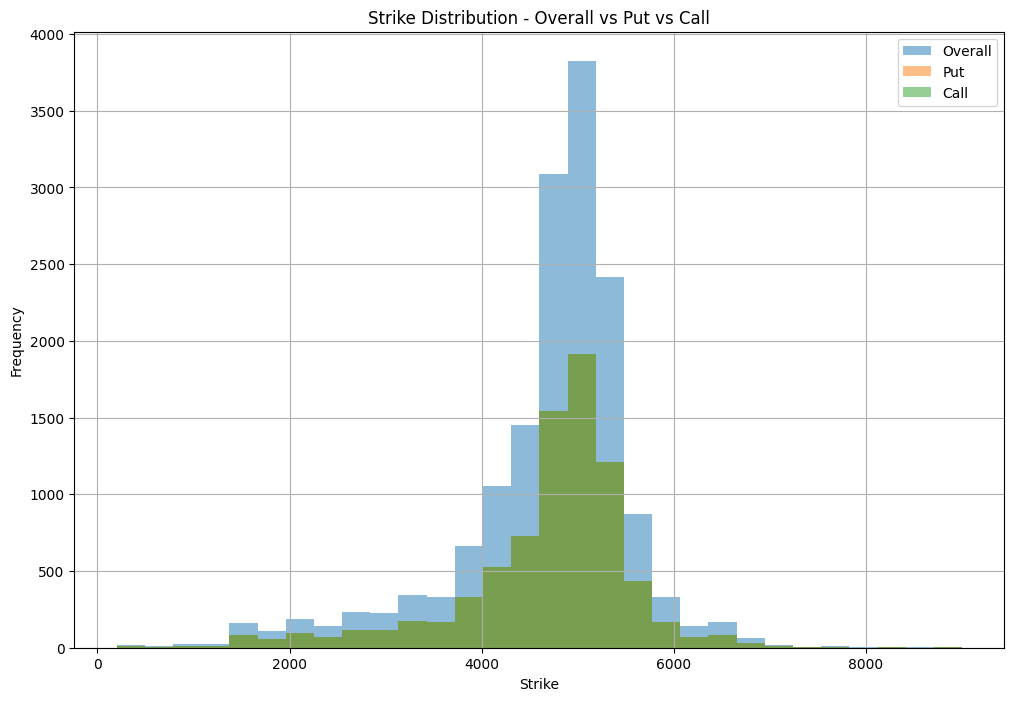

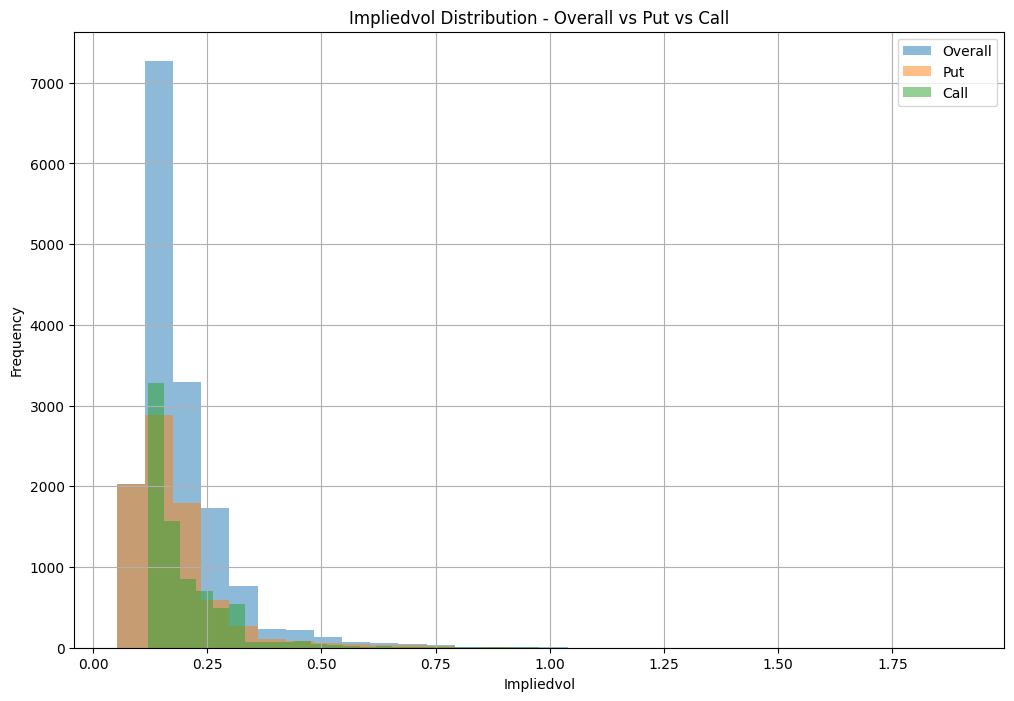

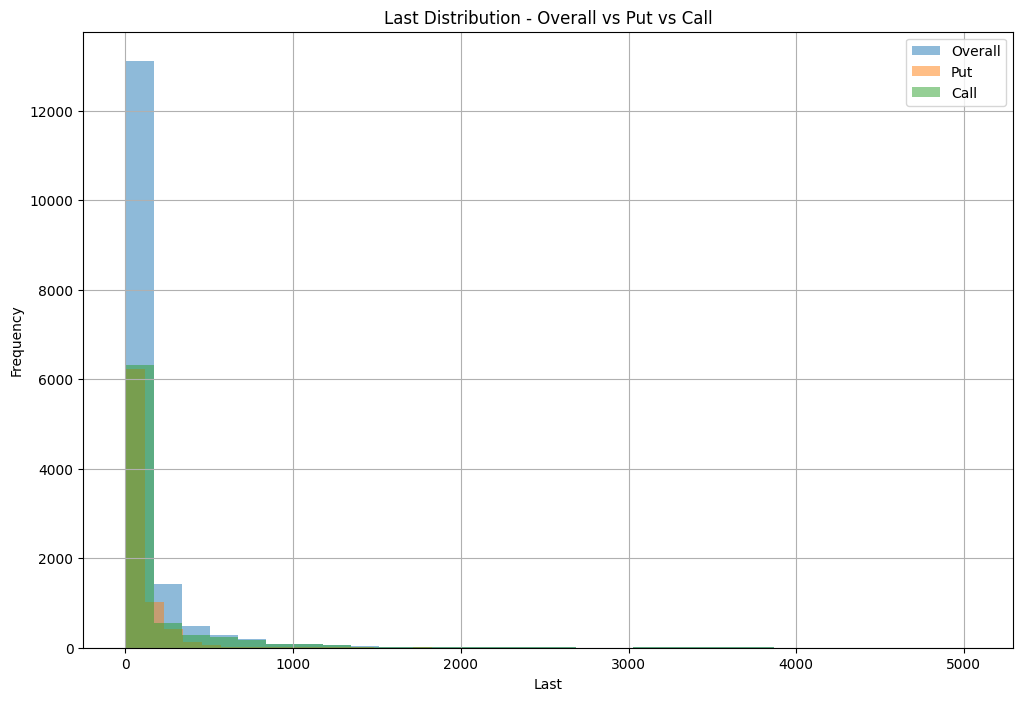

In [10]:
plt.figure(figsize=(12, 8))

for col in ['strike', 'impliedvol', 'last']:
    plt.figure(figsize=(12, 8))
    df[col].hist(alpha=0.5, label='Overall', bins=30)
    df_put[col].hist(alpha=0.5, label='Put', bins=30)
    df_call[col].hist(alpha=0.5, label='Call', bins=30)
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution - Overall vs Put vs Call')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.show()


### Box Plots of values and detecting of outliers

/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_66455/3445915919.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_66455/3445915919.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_66455/3445915919.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


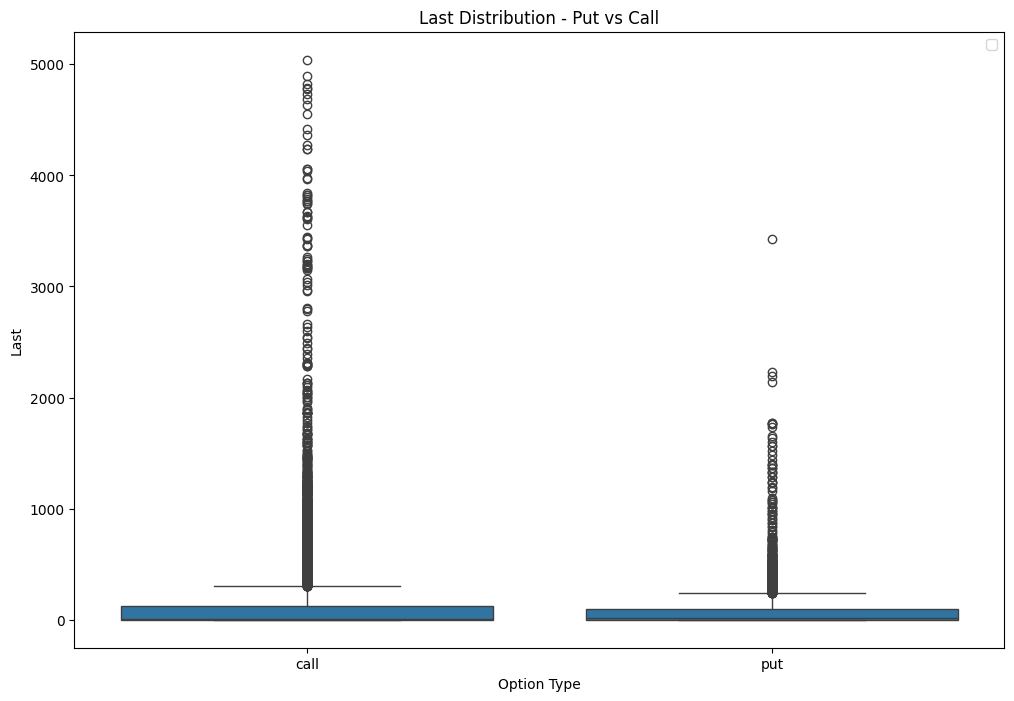

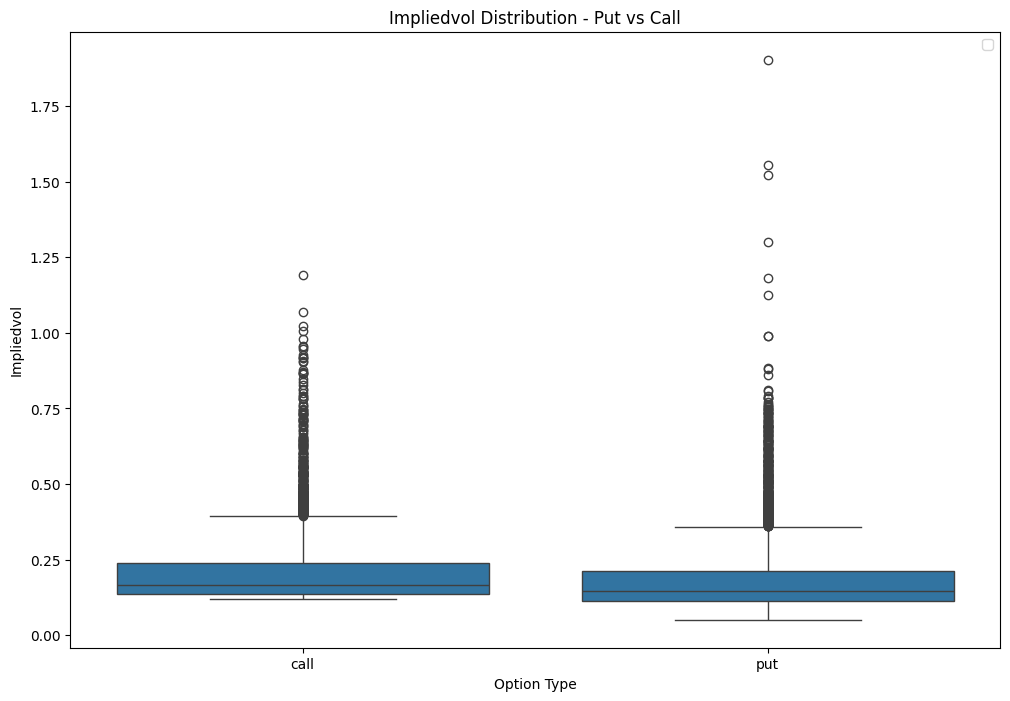

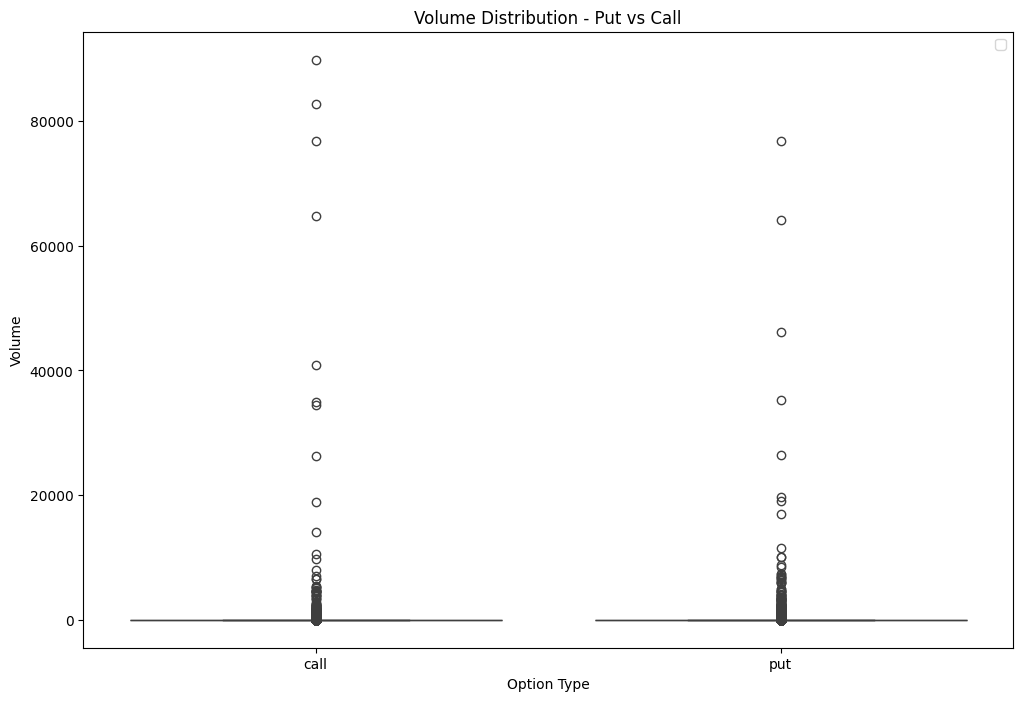

In [11]:
for col in ['last', 'impliedvol', 'volume']:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='type', y=col, data=df)
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution - Put vs Call')
    plt.xlabel("Option Type")
    plt.ylabel(col.capitalize())

# Show plot
plt.show()


# 2. Correlation Analyses

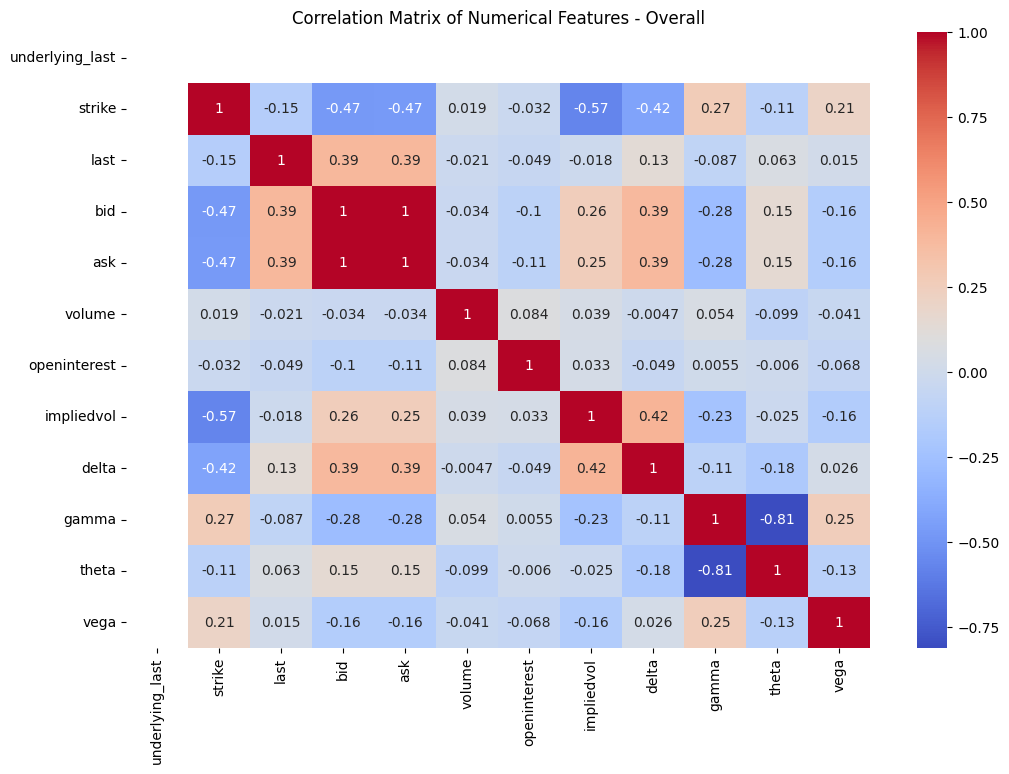

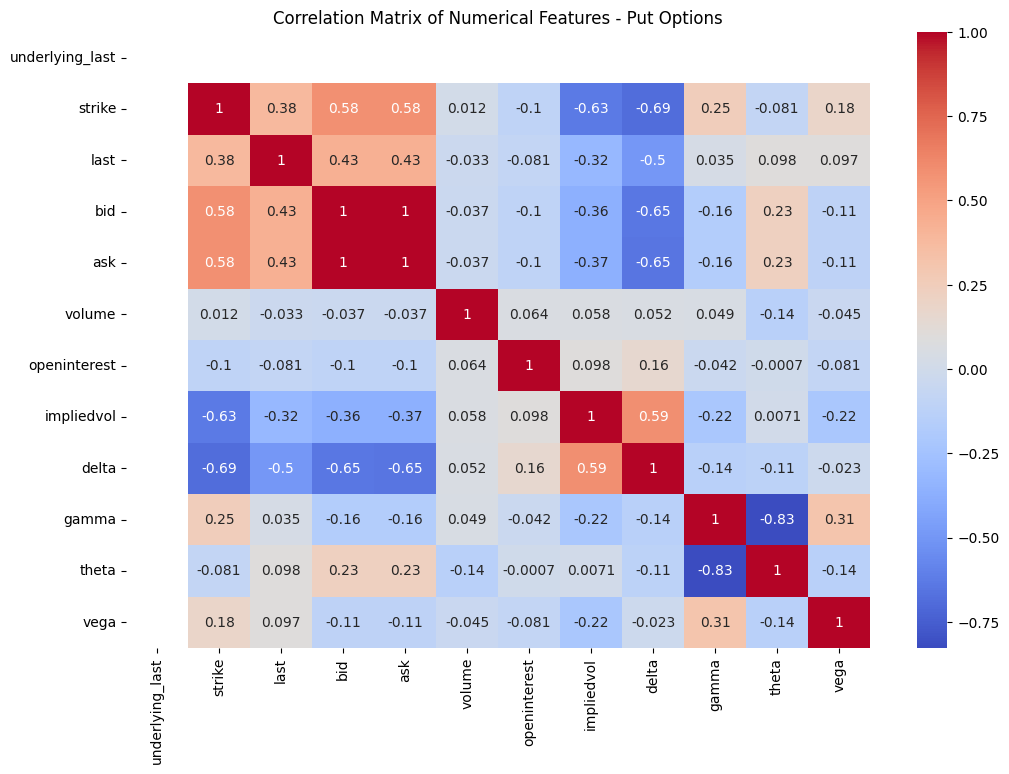

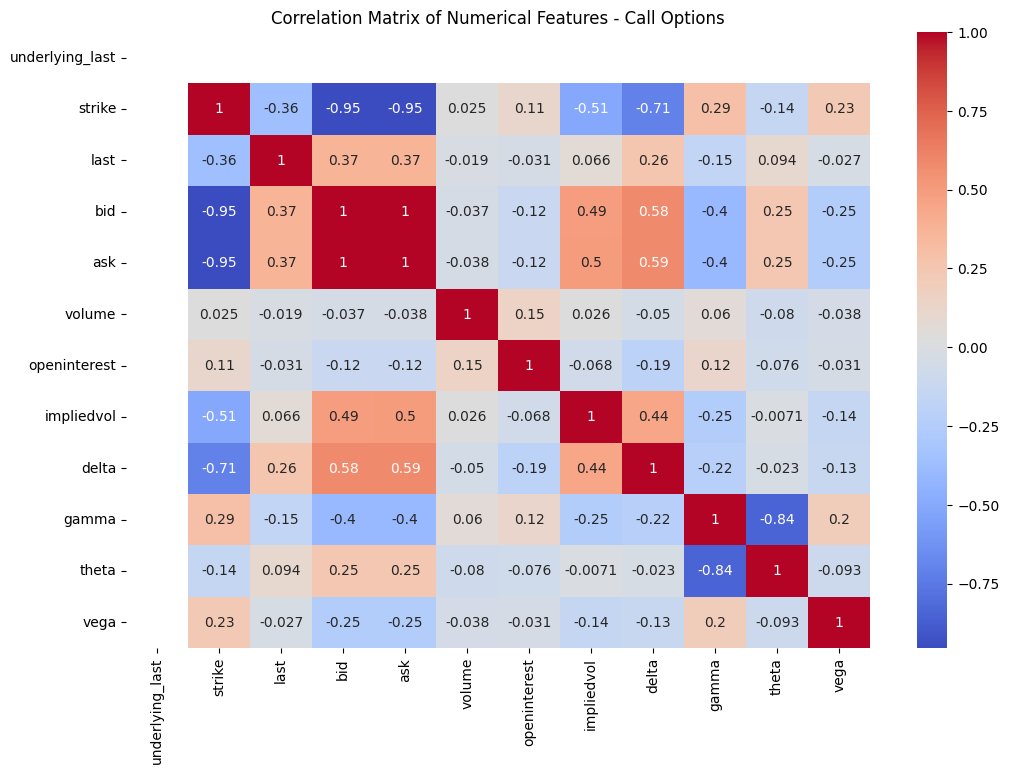

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Overall')
plt.show()

# Put
numeric_df_put = df_put.select_dtypes(include=['float64', 'int64'])

corr_matrix_put = numeric_df_put.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_put, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Put Options')
plt.show()

# Call
numeric_df_call = df_call.select_dtypes(include=['float64', 'int64'])

corr_matrix_call = numeric_df_call.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_call, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Call Options')
plt.show()


### Pairplots for Overall

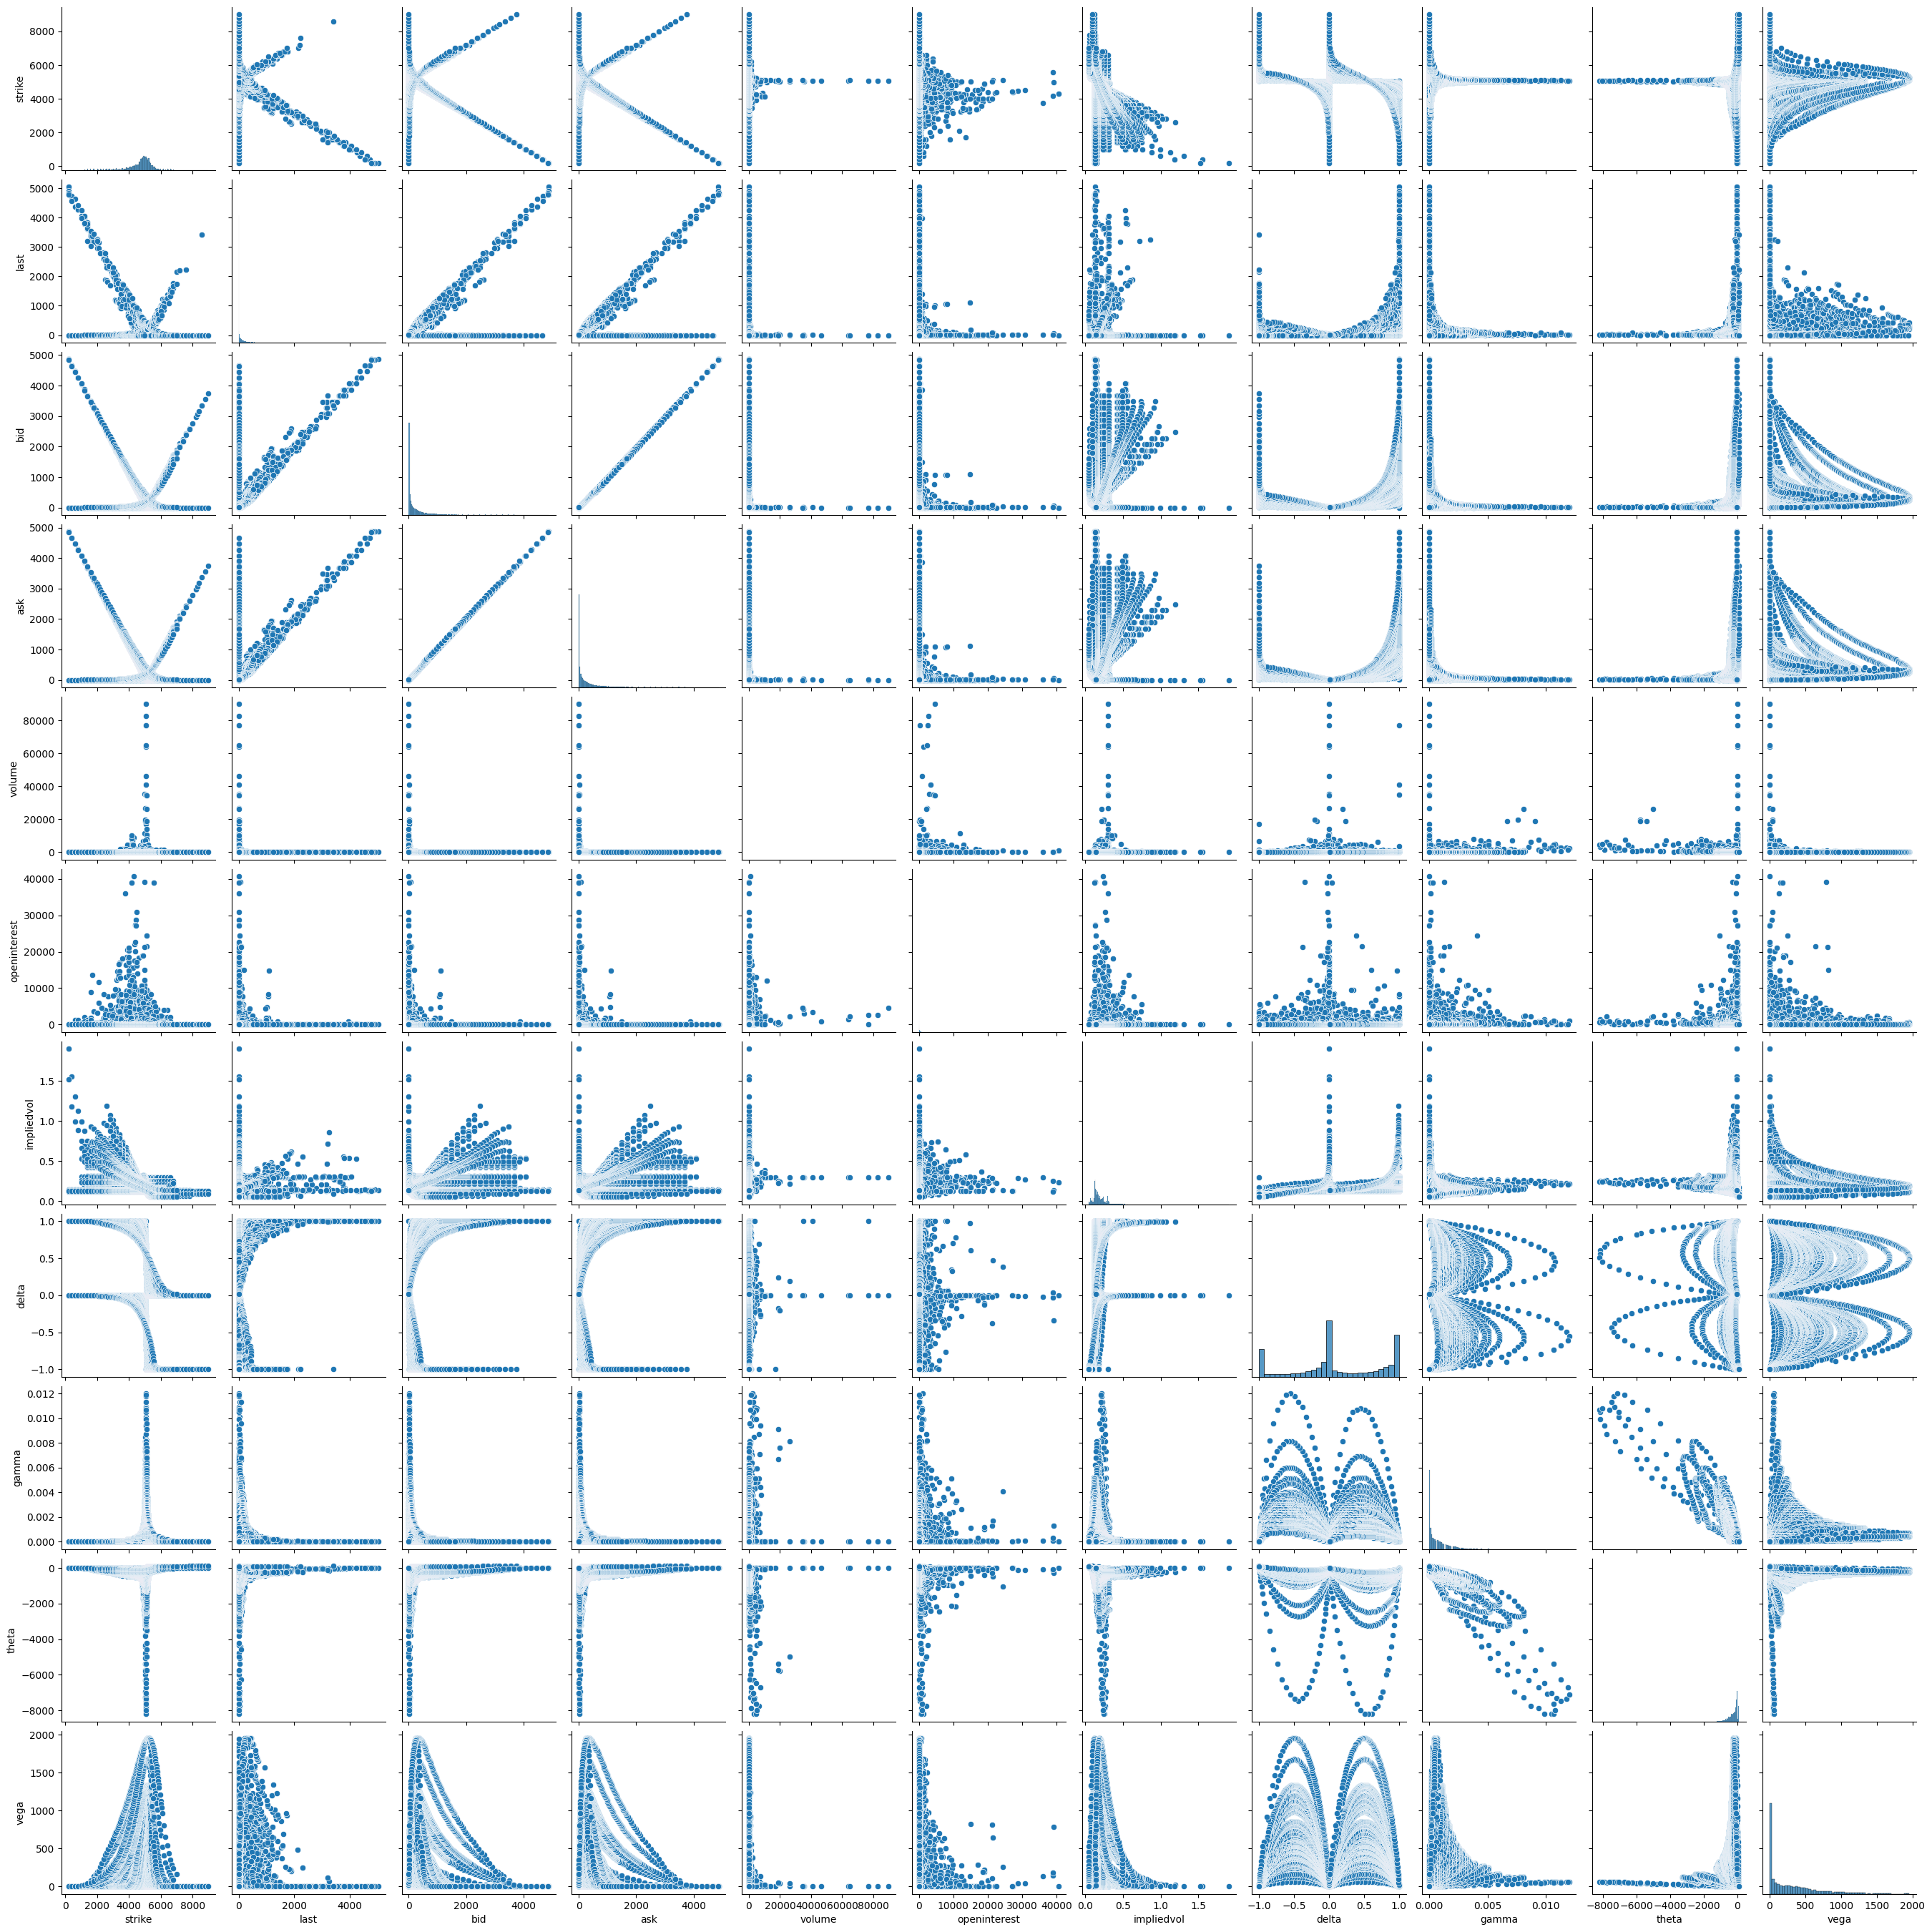

In [13]:
sns.pairplot(df[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

### Pairplots for Puts

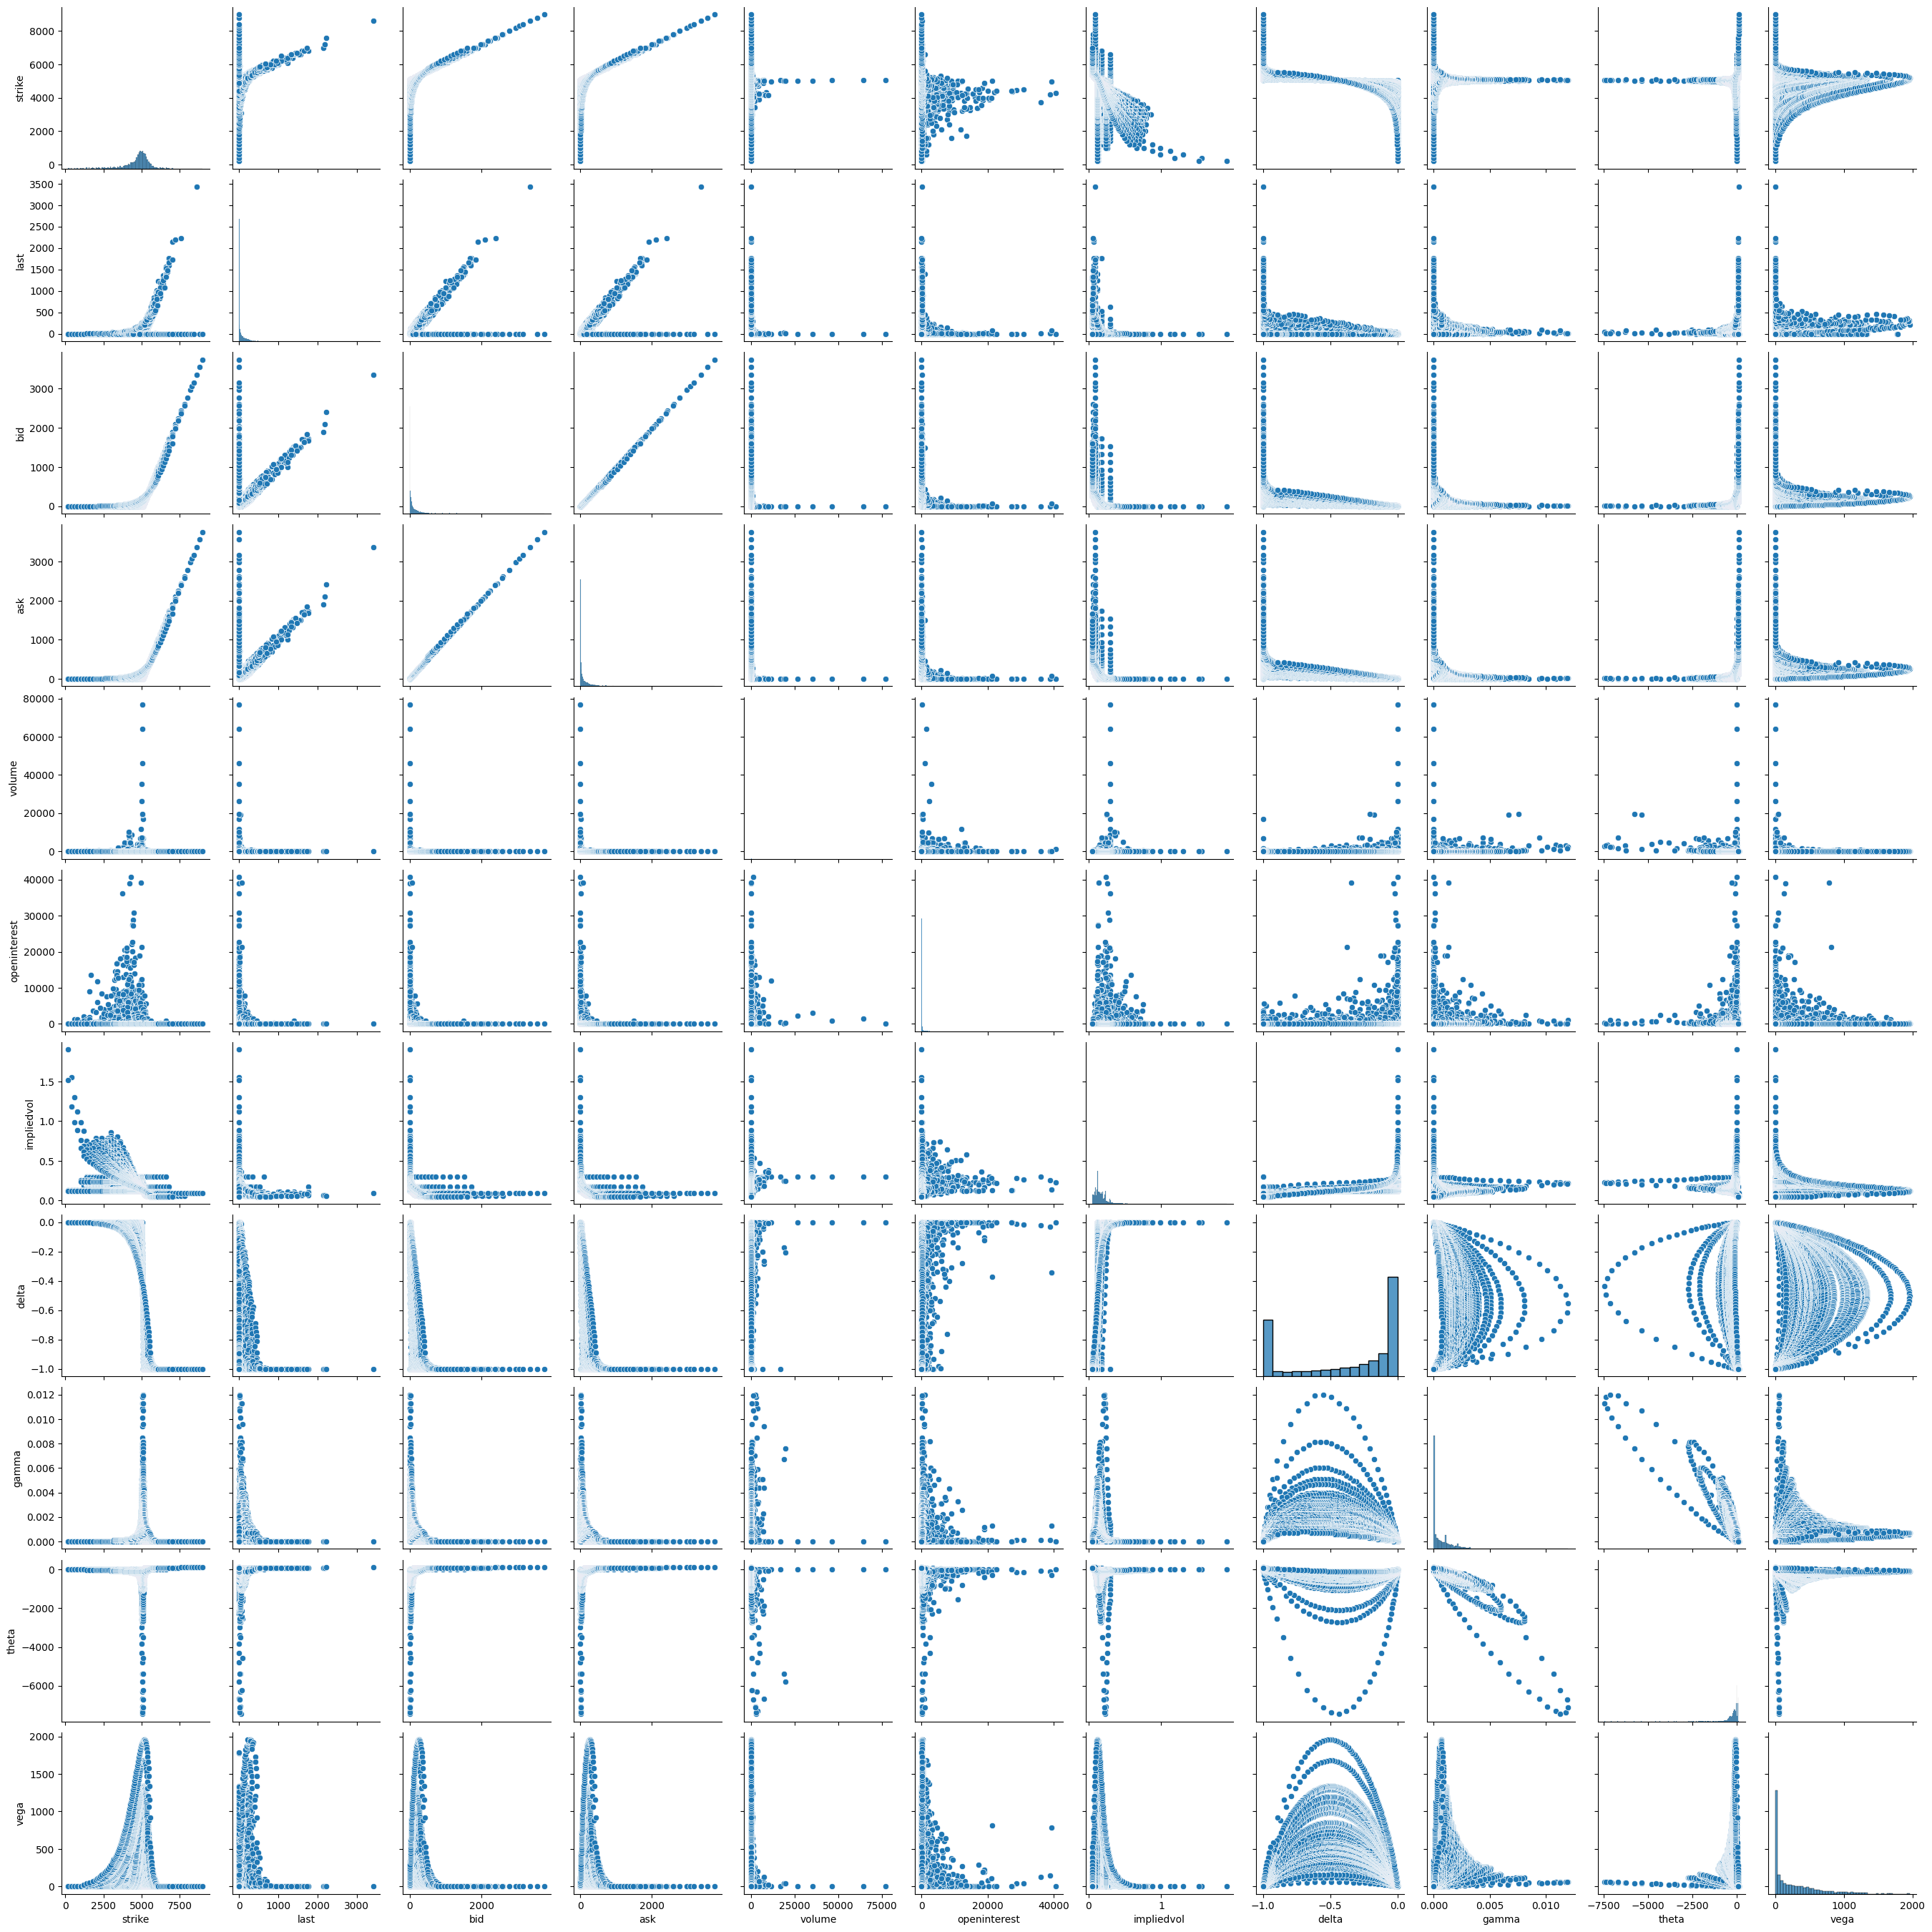

In [14]:
sns.pairplot(df_put[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

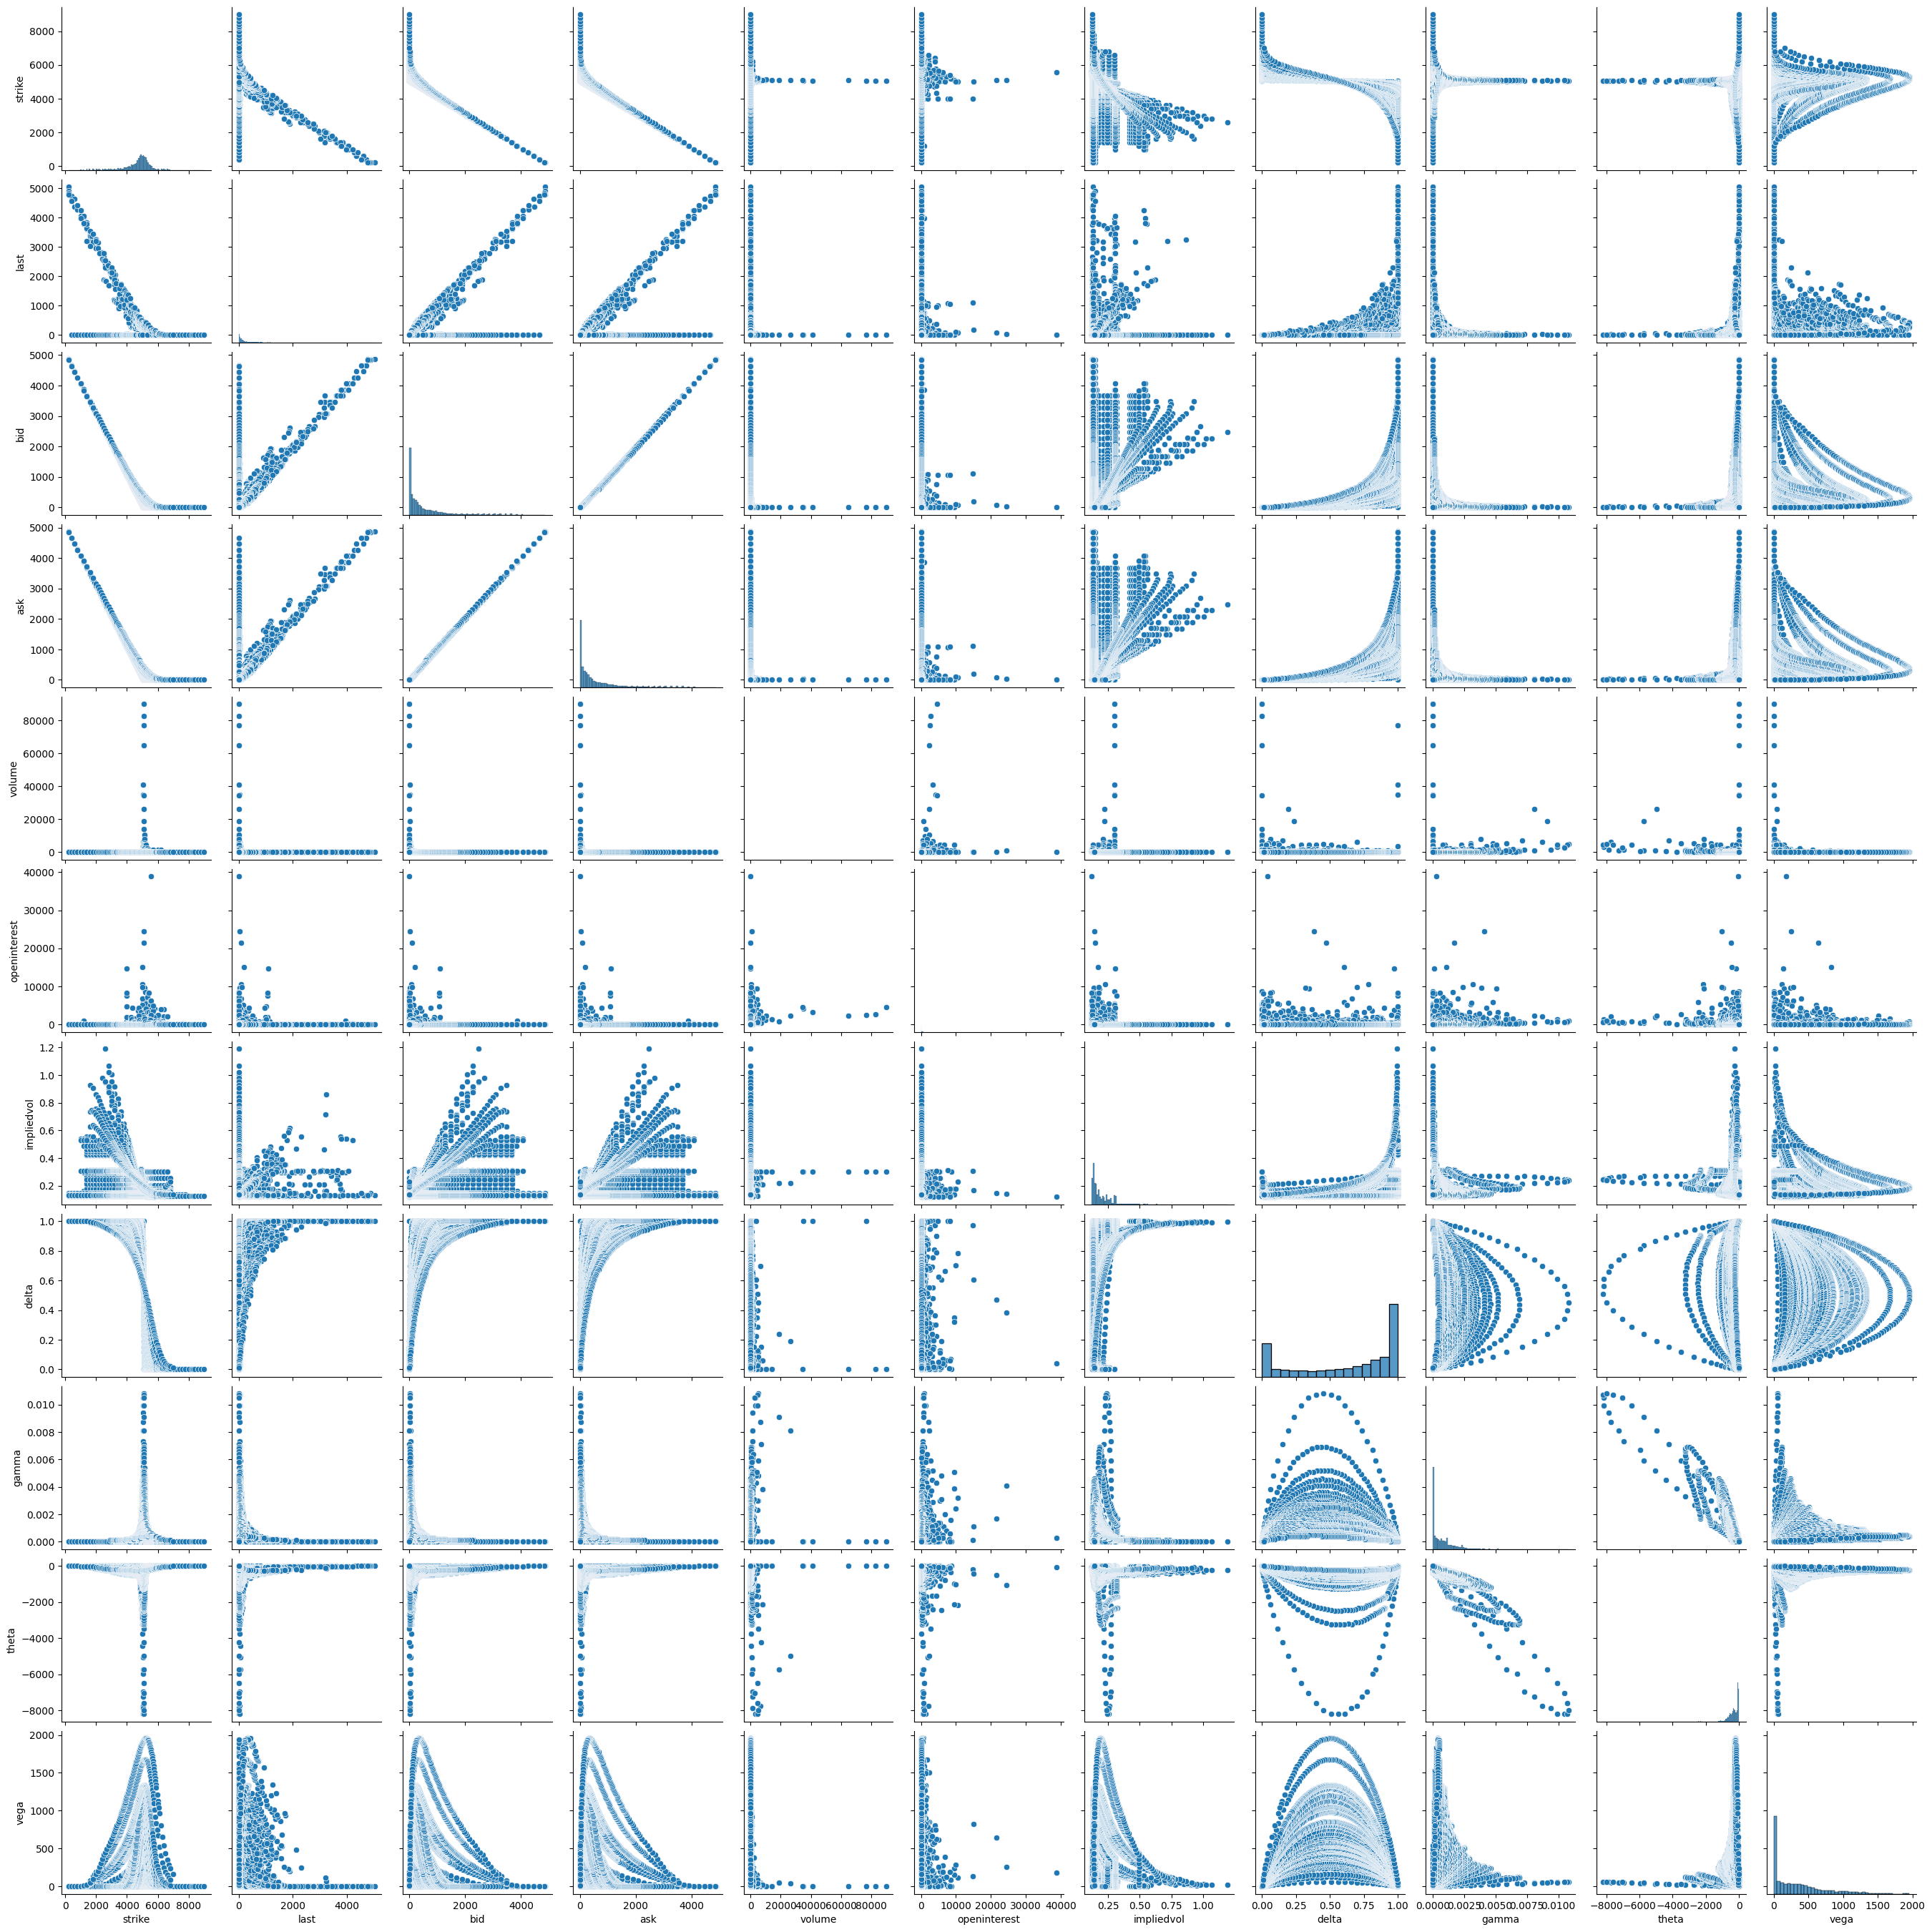

In [15]:
sns.pairplot(df_call[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

# 3. Time Series Data

In [16]:
df.head()

underlying  underlying_last  exchange           optionroot  type expiration  \
0       SPXW        5070.4702         W  SPXW240423C01400000  call 2024-04-23   
1       SPXW        5070.4702         W  SPXW240423P01400000   put 2024-04-23   
2       SPXW        5070.4702         W  SPXW240423C01600000  call 2024-04-23   
3       SPXW        5070.4702         W  SPXW240423P01600000   put 2024-04-23   
4       SPXW        5070.4702         W  SPXW240423C01800000  call 2024-04-23   

            quotedate  strike     last     bid      ask  volume  openinterest  \
0 2024-04-23 16:00:00    1400  3611.70  3653.9  3677.90       1             2   
1 2024-04-23 16:00:00    1400     0.05     0.0     0.05       0             2   
2 2024-04-23 16:00:00    1600  3429.81  3453.9  3477.90       0             2   
3 2024-04-23 16:00:00    1600     0.00     0.0     0.05       0             0   
4 2024-04-23 16:00:00    1800     0.00  3253.9  3277.90       0             0   

   impliedvol  delta  gamma  theta  vega  
0         0.3    1.0    0.0    0.0   0.0  
1         0.3    0.0    0.0    0.0   0.0  
2         0.3    1.0    0.0    0.0   0.0  
3         0.3    0.0    0.0    0.0   0.0  
4         0.3    1.0    0.0    0.0   0.0

<Axes: xlabel='expiration', ylabel='underlying_last'>

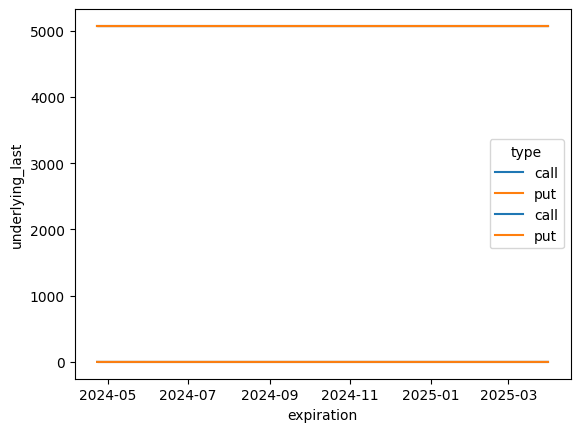

In [17]:
sns.lineplot(x='expiration', y='underlying_last', hue='type', data=df)
sns.lineplot(x='expiration', y='impliedvol', hue='type', data=df)

<Axes: xlabel='expiration', ylabel='last'>

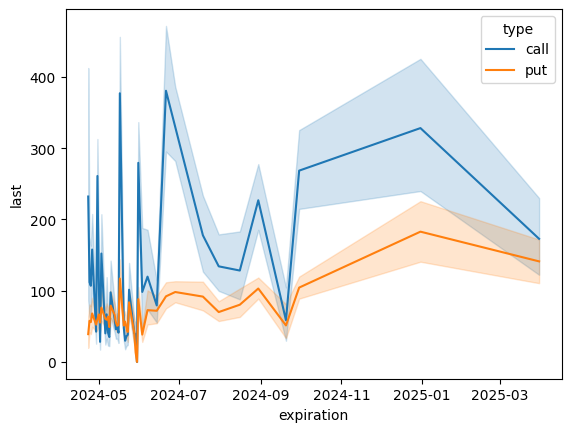

In [18]:
sns.lineplot(x='expiration',y='last',hue='type',data=df)

# 4. Greeks

<Axes: >

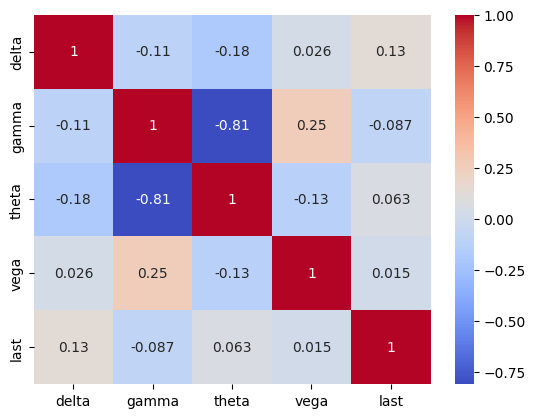

In [19]:
sns.heatmap(df[['delta', 'gamma', 'theta', 'vega', 'last']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='delta', ylabel='last'>

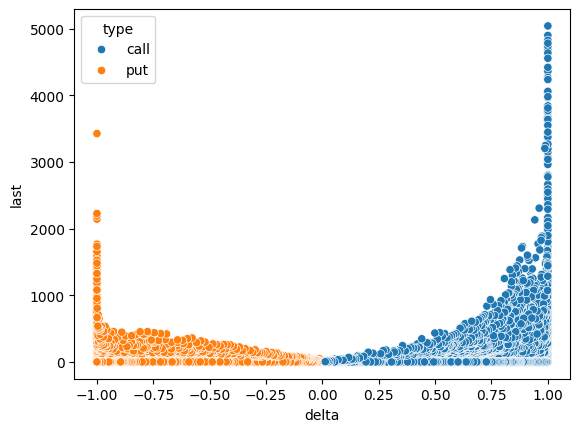

In [20]:
sns.scatterplot(x='delta', y='last', hue='type', data=df)


<Axes: xlabel='gamma', ylabel='last'>

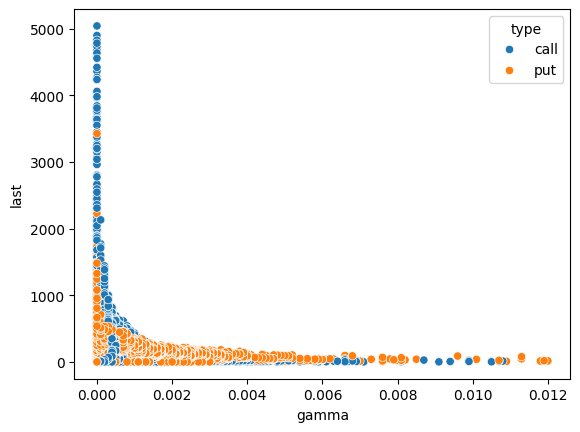

In [21]:
sns.scatterplot(x='gamma', y='last', hue='type', data=df)

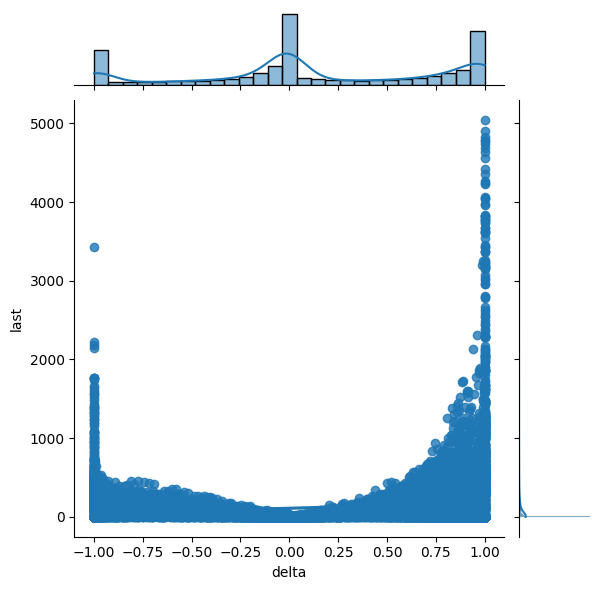

In [22]:
sns.jointplot(x='delta', y='last', data=df, kind='reg')
